In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Data Analyst - Test Data - US.csv")
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [ ]:
df.describe()

,Review,date,Location
count,6393,6448,1711
unique,6384,403,1082
top,Amazing\n \n Read more\n Read less,Jun 2019,United States of America
freq,4,145,116


In [ ]:
df.dropna(subset='Review',inplace=True)

In [ ]:
df.drop(columns='date')

,Review,Location
0,I was very impressed with the resort.\n Great ...,Sebastian
1,The rooms were nice the outside needs work als...,Los Angeles
2,Great location! I have stayed at this hotel on...,Georgia
3,The hotel was adequate for my stay. The strips...,NaN
4,"Great location, room was large and spacious. P...",Palm Harbor
...,...,...
6443,"·the staff were all so friendly. frank, the ch...",United States of America
6444,·the internet barely worked or didn't work,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,United States of America
6446,·we were early for check in and the staff was ...,United States of America


In [ ]:
df['Review'][0]

'I was very impressed with the resort.\n Great staff at the main resort pool bar! We had a blast with them.\n Clean, professional staff, great location and very reasonable!\n  \n  Read more\n  Read less'

In [ ]:
dfl = df
dfl.dropna(subset='Location',inplace=True)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [ ]:
dfl.Review.replace({r'\n  \n  Read more\n  Read less':''}, regex=True, inplace=True)
dfl.Review.replace({r'\n':''}, regex=True, inplace=True)
dfl.Review.replace({r'[?!@#$.,]':''}, regex=True, inplace=True)
dfl.Review.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
dfl.Review=dfl.Review.str.lower()

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
dfl['clean_review'] = dfl['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dfl['clean_review'][0]

'impressed resort great staff main resort pool bar blast clean professional staff great location reasonable'

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def classify_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    compound_score = sentiment_score['compound']

    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
dfl['sentiment'] = dfl['clean_review'].apply(classify_sentiment)

In [ ]:
dfl['Review'][57]

'they made us pay for gym facilities we didnt use it should be an optional fee i came to see new york not to work out'

In [ ]:
dfl.head(50)

,Review,date,Location,clean_review,sentiment
0,i was very impressed with the resort great sta...,2019/08/20,Sebastian,impressed resort great staff main resort pool ...,Positive
1,the rooms were nice the outside needs work als...,2019/08/20,Los Angeles,rooms nice outside needs work also free breakf...,Positive
2,great location i have stayed at this hotel on ...,2019/08/20,Georgia,great location stayed hotel last three trips n...,Positive
4,great location room was large and spacious par...,2019/08/19,Palm Harbor,great location room large spacious parking eas...,Positive
10,very clean and friendly and i love the locatio...,2019/08/19,California,clean friendly love location restaurant inside...,Positive
15,very nice and quiet and clean rooms we will r...,2019/08/19,Redding,nice quiet clean rooms return back area,Positive
24,the room did not seem clean there was some sor...,2019/08/18,Jacksonville,room seem clean sort orange sticky glop bathro...,Positive
29,en general excelente fantstica situacin dos pe...,2019/08/17,España,en general excelente fantstica situacin dos pe...,Neutral
31,les chambres familiales sont pratiques (nous t...,2019/08/17,Montréal,les chambres familiales sont pratiques (nous t...,Negative
38,enjoyed our stay staff was welcoming and frien...,2019/08/16,La quinta,enjoyed stay staff welcoming friendly chose lo...,Positive


In [ ]:
sentiment_counts = dfl[dfl['sentiment'].isin(['Positive', 'Negative'])]
sentiment_counts = sentiment_counts.groupby('Location')['sentiment'].value_counts().unstack(fill_value=0)

sentiment_counts['Total'] = sentiment_counts['Positive'] + sentiment_counts['Negative']

sentiment_counts['Positive_to_Negative_Ratio'] = sentiment_counts['Positive'] / sentiment_counts['Negative']

top_10_locations = sentiment_counts.sort_values(by='Total', ascending=False).head(10)

print(top_10_locations)

sentiment                 Negative  Positive  Total  \
Location                                              
United States of America        14        77     91   
New York                         6        25     31   
California                       4        14     18   
San Jose                         1        16     17   
Canada                           3        11     14   
Florida                          5         8     13   
United Kingdom                   3         9     12   
Seattle                          3         8     11   
San Diego                        2         9     11   
Toronto                          1        10     11   

sentiment                 Positive_to_Negative_Ratio  
Location                                              
United States of America                    5.500000  
New York                                    4.166667  
California                                  3.500000  
San Jose                                   16.000000  
Canada   

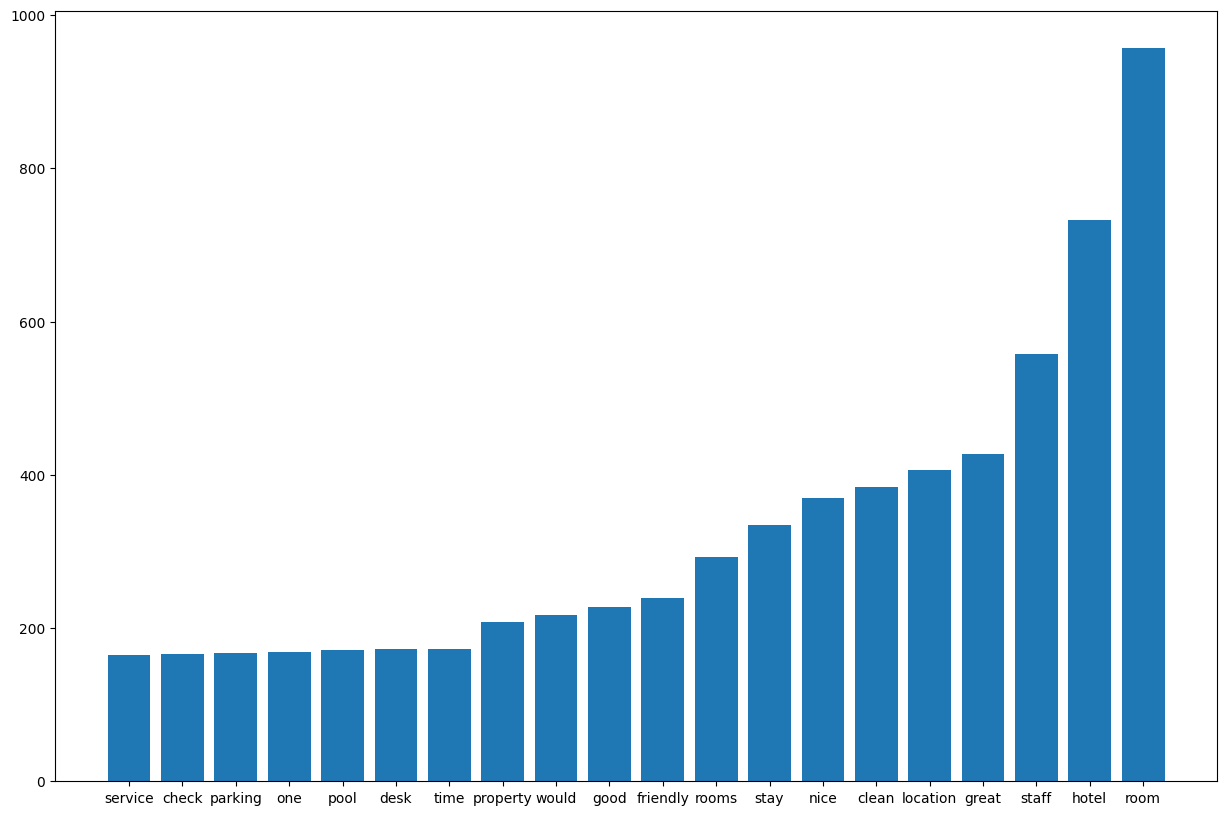

In [ ]:
wordsdata=[]
j=0
for i in df['clean_review']:
    wordsdata.extend(i.split())

fdistdata = FreqDist(wordsdata)

dict_final_data={k: v for k, v in sorted(fdistdata.items(), key=lambda item: item[1])}

plt.figure(figsize=(15,10))
names = list(dict_final_data.keys())[-20:]
values = list(dict_final_data.values())[-20:]
plt.bar(range(20), values, tick_label=names)
plt.show()

In [ ]:
top_10_locations[['Total']]

sentiment,Total
Location,
United States of America,91
New York,31
California,18
San Jose,17
Canada,14
Florida,13
United Kingdom,12
Seattle,11
San Diego,11


In [ ]:
top_loc=['United States of America','New York','California','San Jose','Canada','Florida','United Kingdom','Seattle','San Diego','Toronto']

In [ ]:
for i in top_loc:
    loc=dfl[dfl['Location']==i]
    print(loc.groupby('Location')['clean_review'].apply(lambda x: nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(x)))).nlargest(10))

Location                          
United States of America  room        55
                          staff       40
                          location    37
                          hotel       23
                          service     23
                          good        22
                          clean       21
                          great       18
                          pool        17
                          friendly    16
Name: clean_review, dtype: int64
Location            
New York  room          20
          hotel         19
          nice          12
          staff         11
          front         11
          everything    10
          stay          10
          like           9
          one            9
          desk           9
Name: clean_review, dtype: int64
Location            
California  hotel       14
            nice        11
            room        11
            clean        7
            staff        6
            night        6
            cou